In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd

plt.rcParams["figure.figsize"] = (20, 10)

Here we create two sets (using geographies!). One contains the G7 countries, and the other contains EU countries. 

A set is a collection of unordered elements. Each element must be distinct and immutable

In [2]:
g7 = { 
    "Canada", 
    "France", 
    "Germany", 
    "Italy", 
    "Japan", 
    "U.K. of Great Britain and Northern Ireland", 
    "United States of America"
}

eu = {
    "Austria", 
    "Belgium", 
    "Bulgaria", 
    "Croatia", 
    "Cyprus", 
    "Czech Republic", 
    "Denmark", 
    "Estonia", 
    "Finland", 
    "France", 
    "Germany", 
    "Greece", 
    "Hungary", 
    "Ireland", 
    "Italy", 
    "Latvia", 
    "Lithuania", 
    "Luxembourg", 
    "Malta", 
    "Netherlands", 
    "Poland", 
    "Portugal", 
    "Romania", 
    "Slovakia", 
    "Slovenia", 
    "Spain", 
    "Sweden"
}

print(f"Set: g7 \nitems in set: {len(g7)}\n\n")
print(f"Set: eu \nitems in set: {len(eu)}")

Set: g7 
items in set: 7


Set: eu 
items in set: 27


We can then perform operations on these sets, the main four are: 

![Set operations. source: Datacamp](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526998740/15_union_intersection_difference_symmetric.png)

Union of our sets, values in A or B:

In [3]:
g7.union(eu)

{'Austria',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'U.K. of Great Britain and Northern Ireland',
 'United States of America'}

Intersection of our sets, the values in both A and B:

In [4]:
g7.intersection(eu)

{'France', 'Germany', 'Italy'}

Difference of our sets, the values in A not present in B:

In [5]:
g7.difference(eu)

{'Canada',
 'Japan',
 'U.K. of Great Britain and Northern Ireland',
 'United States of America'}

Difference of our sets, the values in B not present in A (notice how the order matters!):

In [6]:
eu.difference(g7)

{'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'Greece',
 'Hungary',
 'Ireland',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden'}

Symmetric difference, values in A or B but not in both:

In [7]:
g7.symmetric_difference(eu)

{'Austria',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'Greece',
 'Hungary',
 'Ireland',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'U.K. of Great Britain and Northern Ireland',
 'United States of America'}

Bringing it back to geography, here's a dataframe of adminstrative boundaries found [here](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/?location=3,41.53161,21.19922&basemap=jawg.light)

First we load the data in using geopandas.

In [8]:
from typing import Set
import geopandas as gpd

# define a function for the plotting
def plot_set(inp_df: gpd.GeoDataFrame, inp_set: Set[str], title: str) -> None:
    inp_df[inp_df["name"].isin(inp_set)].plot(column="continent")
    plt.title(title)


df = gpd.read_file("./world-administrative-boundaries/world-administrative-boundaries.shp")[["name", "continent", "geometry"]]
df

,name,continent,geometry
0,Ma'tan al-Sarra,Africa,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
1,Switzerland,Europe,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ..."
2,Jersey,Europe,"POLYGON ((-2.01500 49.21417, -2.02111 49.17721..."
3,Austria,Europe,"POLYGON ((16.94618 48.61907, 16.94333 48.57333..."
4,Portugal,Europe,"POLYGON ((-7.43185 37.25319, -7.41903 37.18055..."
...,...,...,...
251,Albania,Europe,"POLYGON ((20.07142 42.56091, 20.10208 42.53347..."
252,Gibraltar,Europe,"POLYGON ((-5.35580 36.16331, -5.33451 36.16256..."
253,New Zealand,Oceania,"MULTIPOLYGON (((169.18552 -52.57695, 169.16166..."
254,Madeira Islands,Europe,"POLYGON ((-17.10250 32.82333, -17.05306 32.809..."


Now lets plot the countries in our first set (g7), using the continent column to decide the colour of the country in the plot

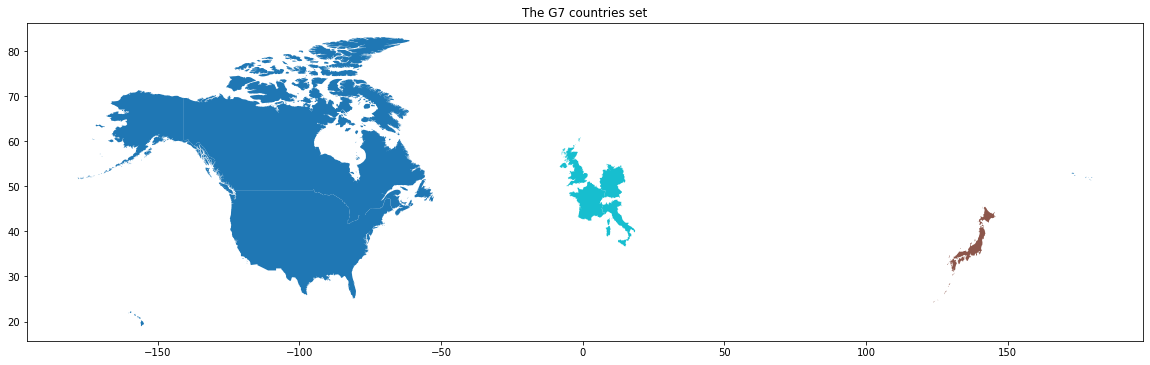

In [9]:
plot_set(df, g7, "The G7 countries set")

Now we can plot the countries in our other set (eu)

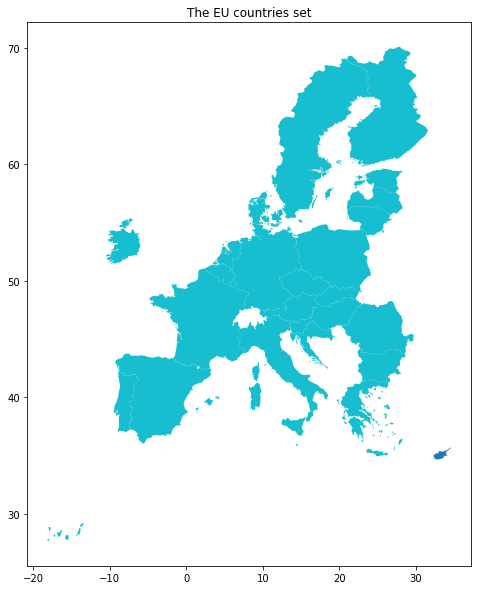

In [10]:
plot_set(df, eu, "The EU countries set")

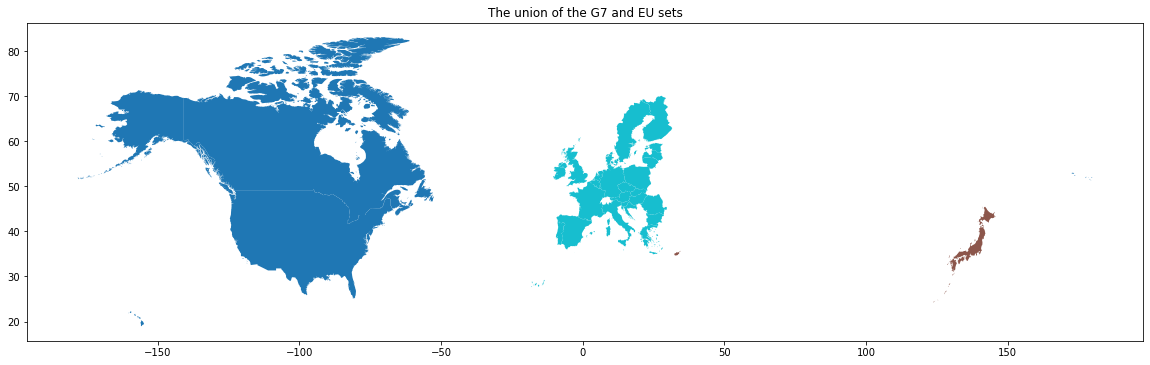

In [11]:
plot_set(df, g7.union(eu), "The union of the G7 and EU sets")

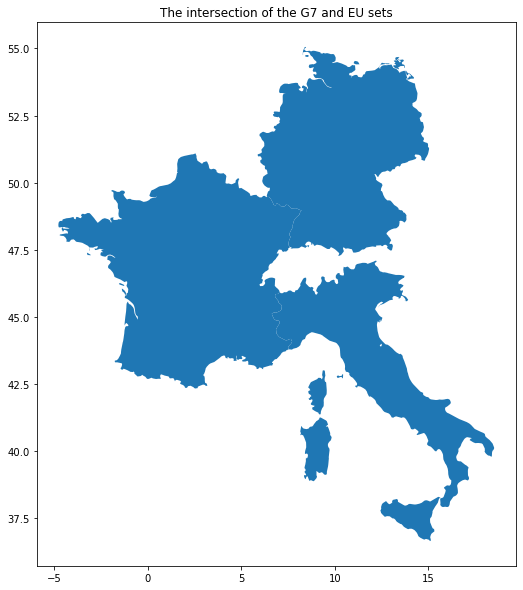

In [12]:
plot_set(df, g7.intersection(eu), "The intersection of the G7 and EU sets")

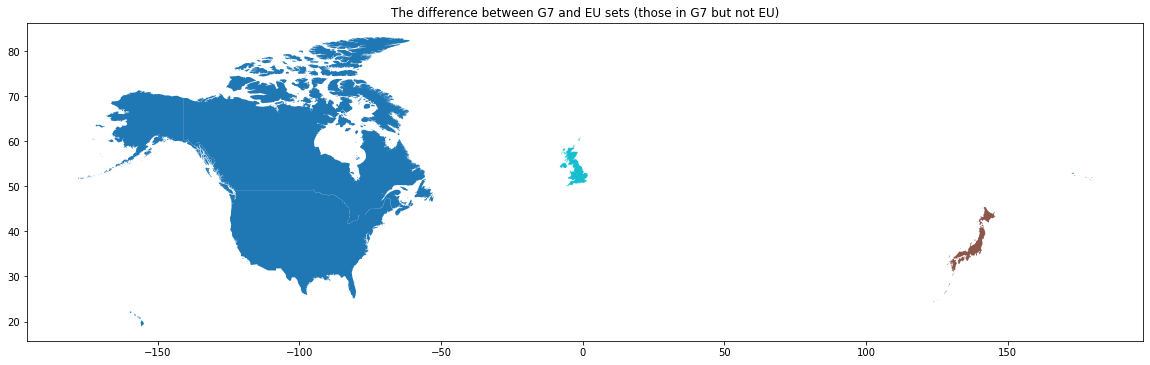

In [13]:
plot_set(df, g7.difference(eu), "The difference between G7 and EU sets (those in G7 but not EU)")

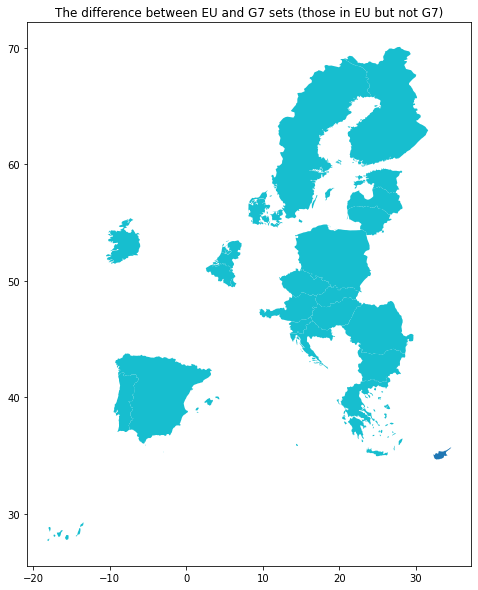

In [14]:
plot_set(df, eu.difference(g7), "The difference between EU and G7 sets (those in EU but not G7)")

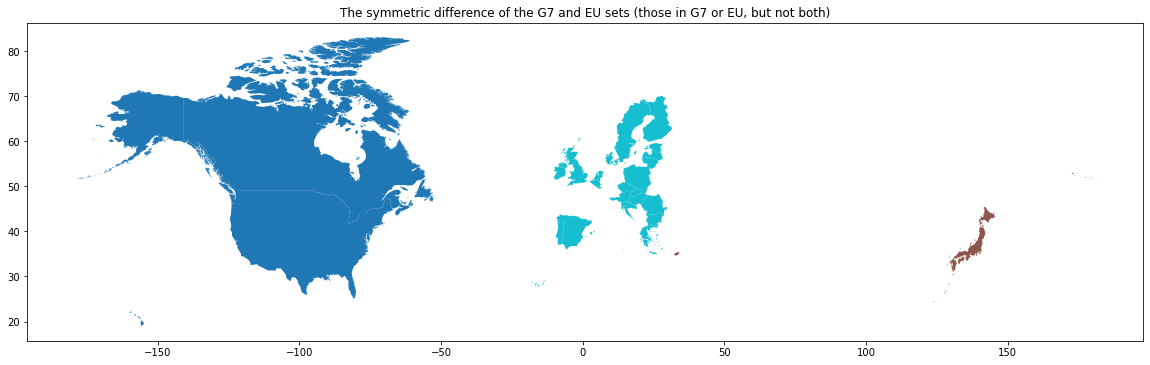

In [15]:
plot_set(df, eu.symmetric_difference(g7), "The symmetric difference of the G7 and EU sets (those in G7 or EU, but not both)")